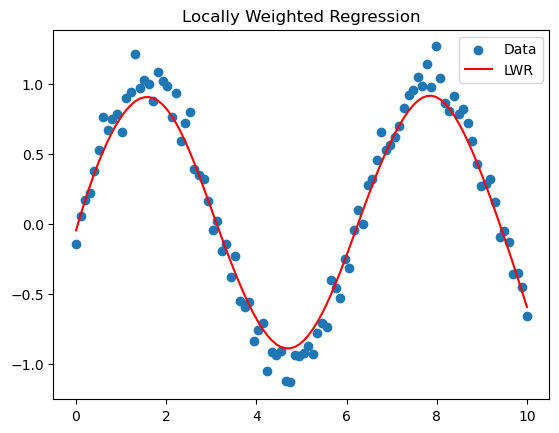

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
df = pd.read_csv("lwr_dataset.csv")
X,y = df[['X']].values,df['Y'].values

def lwr(X,y,tau=0.5):
    X_ = np.hstack([np.ones((X.shape[0],1)),X])
    x_vals = np.linspace(X.min(),X.max(),100)
    y_vals = []
    for x in x_vals:
        w = np.exp(-((X-x)**2) / (2*tau**2)).flatten()
        W = np.diag(w)
        theta = np.linalg.pinv(X_.T @ W @ X_) @ (X_.T @ W @ y)
        y_vals.append(np.array([1, x]) @ theta)

    plt.scatter(X,y,label="Data")
    plt.plot(x_vals,y_vals,'r',label="LWR")
    plt.legend()
    plt.title('Locally Weighted Regression')
    plt.show()

lwr(X,y)

D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


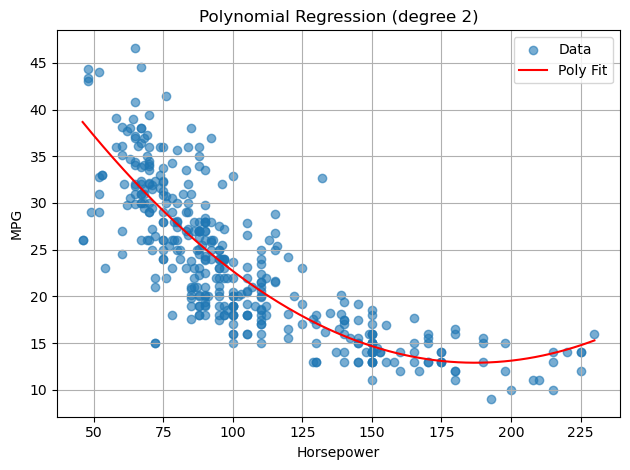

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Load and prepare data
df = sns.load_dataset("mpg").dropna(subset=['horsepower', 'mpg'])
X, y = df[['horsepower']], df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Regression
degree = 2
poly = PolynomialFeatures(degree)
model = LinearRegression().fit(poly.fit_transform(X_train), y_train)

# Predict for curve
X_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_range_pred = model.predict(poly.transform(X_range))

# Plot
plt.scatter(X, y, alpha=0.6, label='Data')
plt.plot(X_range, y_range_pred, color='red', label='Poly Fit')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title(f'Polynomial Regression (degree {degree})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


 MSE : 25.02, RMSE : 5.00 , R2 : 0.66


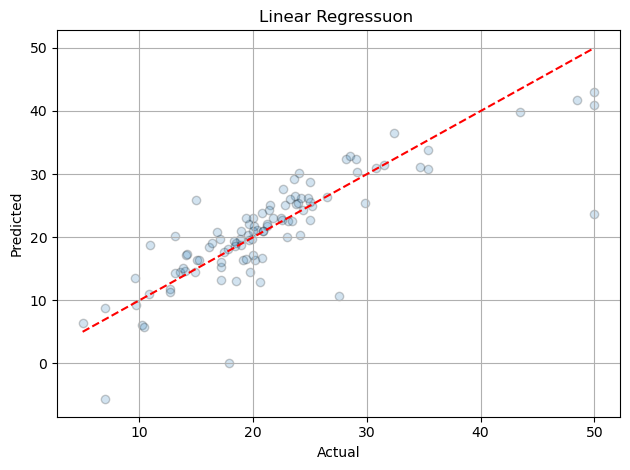

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("Boston.csv")
data.fillna(data.mean(),inplace=True)
X= data.drop(columns="MEDV")
y= data["MEDV"]

X_scaled = StandardScaler().fit_transform(X)
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred) 

print(f" MSE : {mse:.2f}, RMSE : {rmse:.2f} , R2 : {r2:.2f}")

plt.scatter(y_test,y_pred, alpha=0.2, edgecolor='k')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.title("Linear Regressuon ")
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()



D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


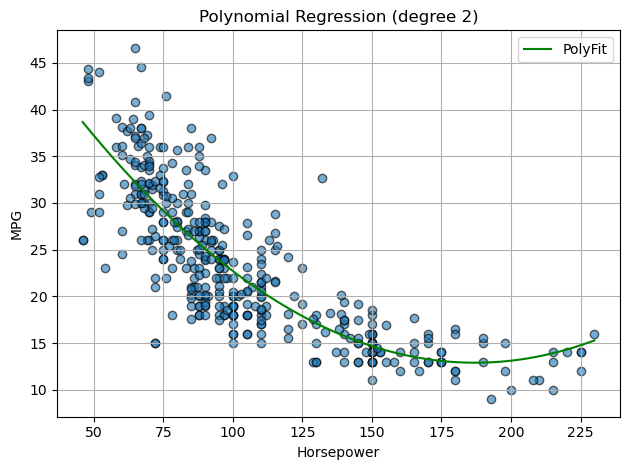

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
df = sns.load_dataset("mpg").dropna(subset=['horsepower','mpg'])
X,y = df[['horsepower']],df['mpg']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=42)

degree = 2
poly = PolynomialFeatures(degree)
model = LinearRegression().fit(poly.fit_transform(X_train), y_train)

X_range = np.linspace(X.min(), X.max(),200).reshape(-1,1)
y_range_pred = model.predict(poly.transform(X_range))

plt.scatter(X,y, alpha=0.6, edgecolor='k')
plt.plot(X_range,y_range_pred, color='green' , label='PolyFit')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title(f'Polynomial Regression (degree {degree})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy: 0.93


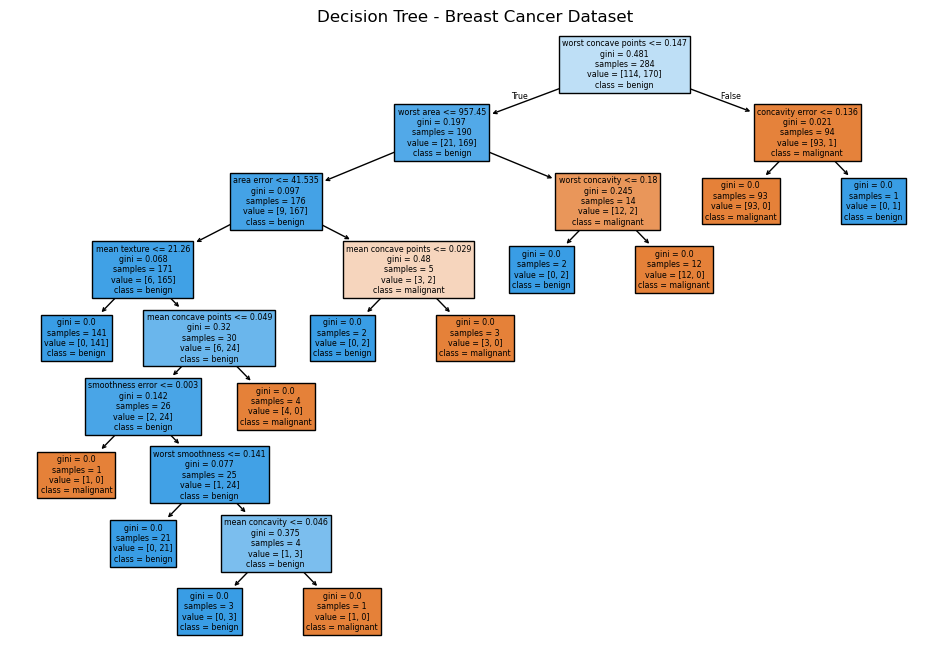

In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier , plot_tree

data = load_breast_cancer()
X,y= data.data , data.target

X_train,X_test,y_train , y_test = train_test_split(X,y, test_size=0.5, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc:.2f}")


plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title('Decision Tree - Breast Cancer Dataset')
plt.show()

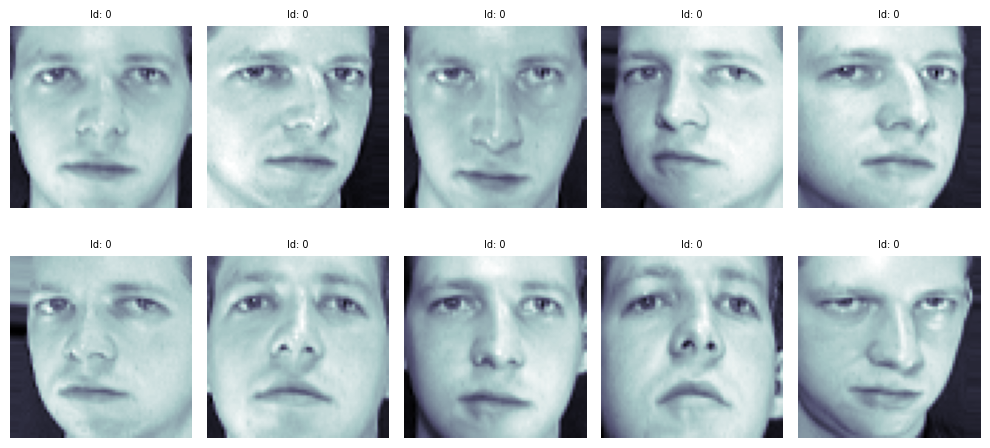

In [52]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

data = fetch_olivetti_faces()
images, targets = data.images, data.target

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(images[i], cmap='bone')
    ax.axis('off')
    ax.set_title(f"Id: {targets[i]}", fontsize=7)
plt.tight_layout()
plt.show()


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


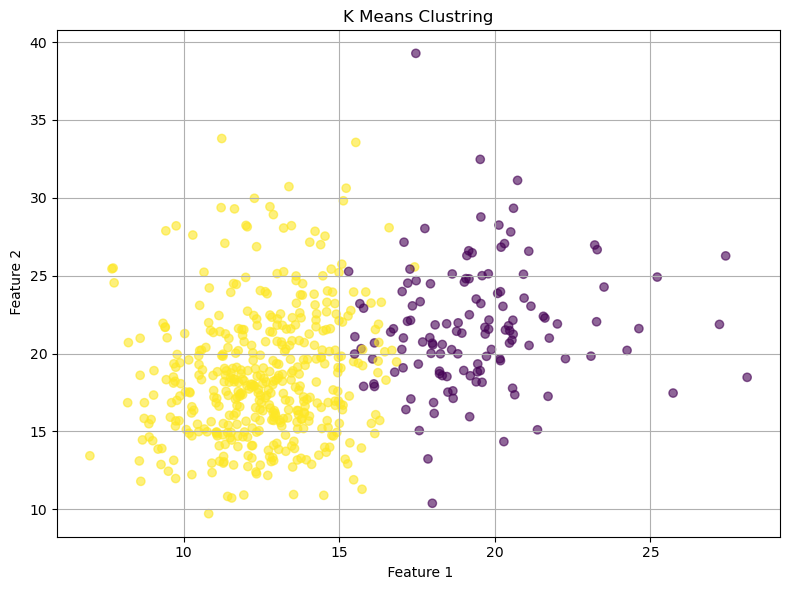

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans

data = load_breast_cancer()
X= data.data
model = KMeans(n_clusters=2,n_init=10, random_state=42)
model.fit(X) 
labels = model.labels_

plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1], c=labels , cmap='viridis', alpha=0.6)
plt.title("K Means Clustring")
plt.xlabel(' Feature 1')
plt.ylabel(' Feature 2')
plt.grid(True)
plt.tight_layout()
plt.show()

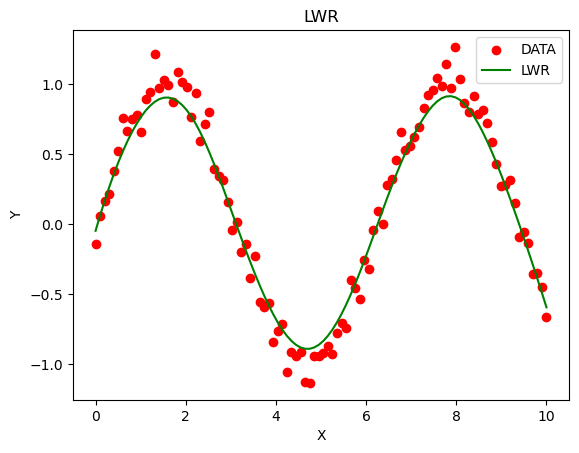

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

df = pd.read_csv("lwr_dataset.csv")
X,y = df[["X"]].values ,df["Y"].values 

def lwr(X,y,tau=0.5):
    X_ = np.hstack([np.ones((X.shape[0],1)),X])
    x_vals = np.linspace(X.min(),X.max(),100)
    y_vals=[]
    for x in x_vals:
        w = np.exp(-((X-x)**2) / (2*tau**2)).flatten()
        W = np.diag(w)
        theta = np.linalg.pinv(X_.T @ W @ X_) @ (X_.T @ W @ y)
        y_vals.append(np.array([1,x]) @ theta)
    plt.scatter(X,y,color='r',label='DATA')
    plt.plot(x_vals,y_vals,color='g',label="LWR")
    plt.title("LWR")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()
lwr(X,y)

 MSE : 25.42,RMSE :5.04,R2 :0.69


C:\Users\Suhas naik\AppData\Local\Temp\ipykernel_16412\4182118175.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


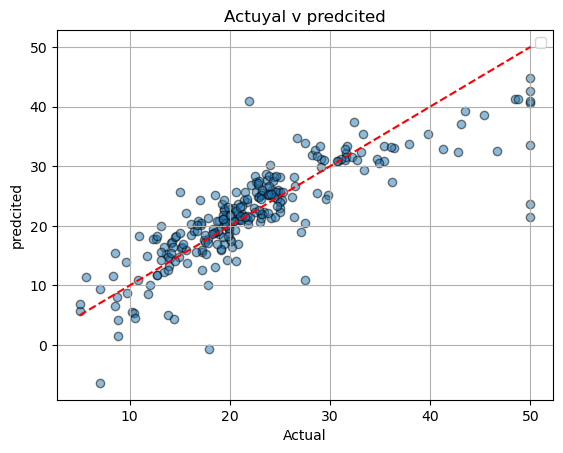

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error , r2_score

data = pd.read_csv("Boston.csv")
data.fillna(data.mean() , inplace=True)
X = data.drop(columns="MEDV")
y = data["MEDV"]

x_scaled = StandardScaler().fit_transform(X)
X_train , X_test , y_train , y_test = train_test_split(x_scaled, y , test_size=0.5 , random_state=42)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)

print(f" MSE : {mse:.2f},RMSE :{rmse:.2f},R2 :{r2:.2f}")

plt.scatter(y_test,y_pred,alpha=0.5, edgecolor='k')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.title("Actuyal v predcited")
plt.xlabel("Actual")
plt.ylabel("predcited")
plt.grid(True)
plt.legend()
plt.show()

D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


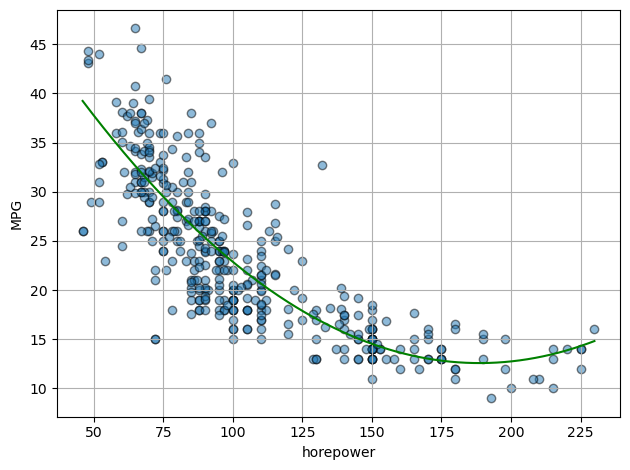

In [26]:
import numpy as np
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

df = sns.load_dataset("mpg").dropna(subset=['horsepower','mpg'])
X,y = df[["horsepower"]],df["mpg"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.6, random_state=42)

degree=2
poly = PolynomialFeatures(degree)
model = LinearRegression().fit(poly.fit_transform(X_train),y_train)

X_range = np.linspace(X.min(),X.max(),200).reshape(-1,1)
y_pred = model.predict(poly.transform(X_range))

plt.scatter(X,y,alpha=0.5,edgecolor='k')
plt.plot(X_range,y_pred,color='green' , label='PolyFit')
plt.xlabel("horepower")
plt.ylabel("MPG")
plt.tight_layout()
plt.grid(True)
plt.show()

 ACCuracy : 0.94


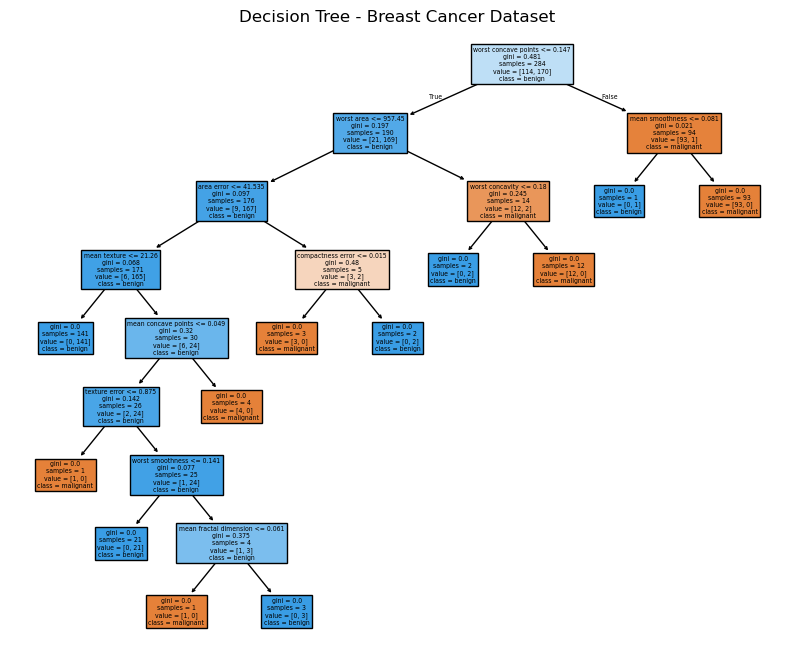

In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier , plot_tree

data= load_breast_cancer()
X,y = data.data , data.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)

model= DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(f" ACCuracy : {acc:.2f}")

plt.figure(figsize=(10,8))
plot_tree(model, filled = True , feature_names = data.feature_names , class_names = data.target_names)
plt.title('Decision Tree - Breast Cancer Dataset')
plt.show()

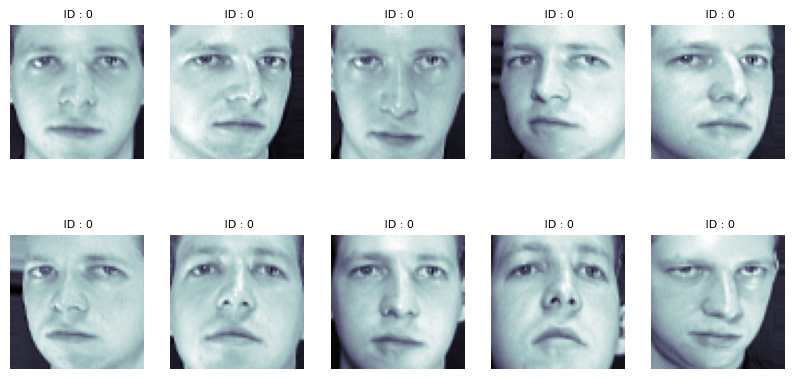

In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces


df = fetch_olivetti_faces()
images, targets = df.images , df.target

fig , axes = plt.subplots(2,5,figsize=(10,5))
for i,ax in enumerate(axes.ravel()):
    ax.imshow(images[i],cmap='bone')
    ax.axis("off")
    ax.set_title(f" ID : {targets[i]}",fontsize=8)
plt.show()



D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


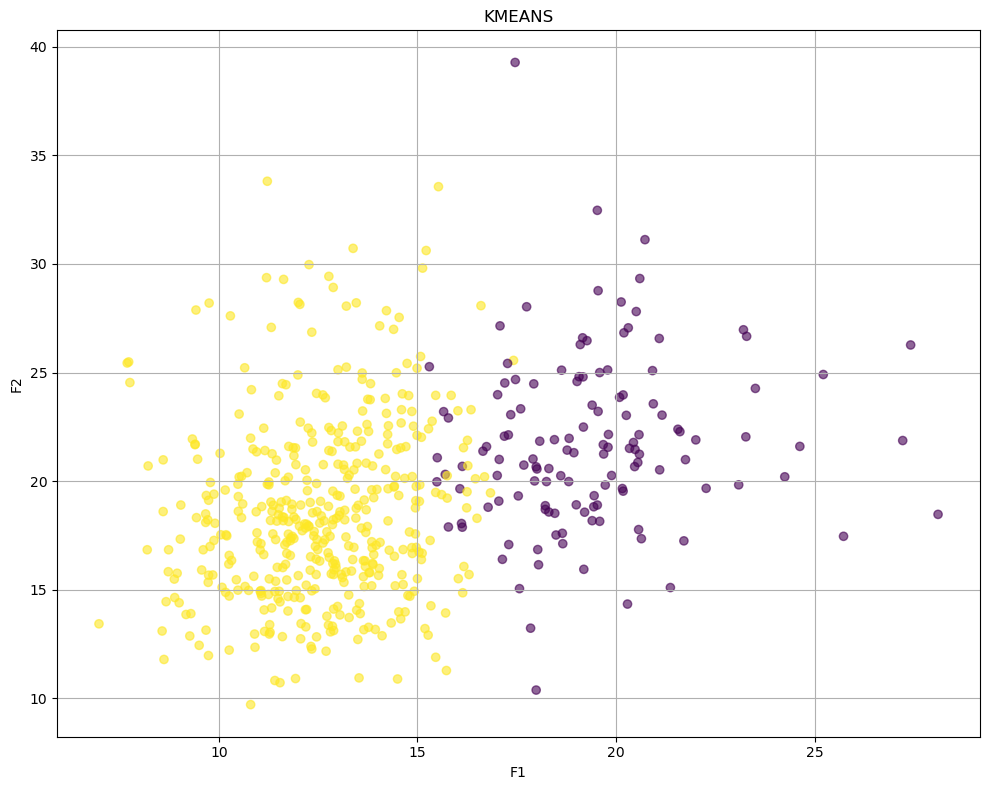

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans

df = load_breast_cancer()
X = data.data
model = KMeans(n_clusters=2,n_init=10,random_state=42)
model.fit(X)
labels = model.labels_

plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],c=labels , cmap='viridis',alpha=0.6)
plt.title("KMEANS")
plt.xlabel("F1")
plt.ylabel("F2")
plt.grid(True)
plt.tight_layout()
plt.show()